# Taller preparatorio para el parcial usando R

Notas del Curso Gestión de la calidad y control estadístico de procesos

** Ibeth Vergara Baquero**   
ivergara@uco.edu.co   
Universidad Católica de Oriente   
Facultad de ingenierías    
Rionegro, Colombia

> ** Objetivo del taller:** Prácticar los temas vistos en clase.

**Bibliografía**.
> [dataset "ChickWeight"](http://127.0.0.1:14953/library/datasets/html/ChickWeight.html)  


Para realizar el taller se ha trabajado con el dataset de R llamado ChickWeight. Se utilizo R para resolver el taller, recuerden que pueden usar otro software adicional a esté.

**1.** Una empresa dedicada a la cría de pollo para la venta está interesada en el
aumento del peso de los pollos por lo que ha decidido utilizar diversas dietas
para lograr su objetivo. El dueño de la compañía lo ha contratado a usted para
que trate de responder a las siguientes preguntas o dudas que a él le surgen. El
dueño quiere saber:    
**a.** En donde se encuentran concentrados los pesos de los pollos
indiferente a la dieta que están usando.  
**b.** En donde se encuentran concentrados los pesos de los pollos
dependiendo de las dietas.  
**c.** Como es el comportamiento de los pesos para las diferentes dietas. Este
análisis deberá de incluir un análisis del promedio de los pesos y los
diferentes cuartiles de los mismos. 

**Solución:**

**a.** En donde se encuentran concentrados los pesos de los pollos
indiferente a la dieta que están usando.  

In [3]:
attach(ChickWeight) # Guardamos en memoria la base de datos

The following objects are masked from ChickWeight (pos = 3):

    Chick, Diet, Time, weight



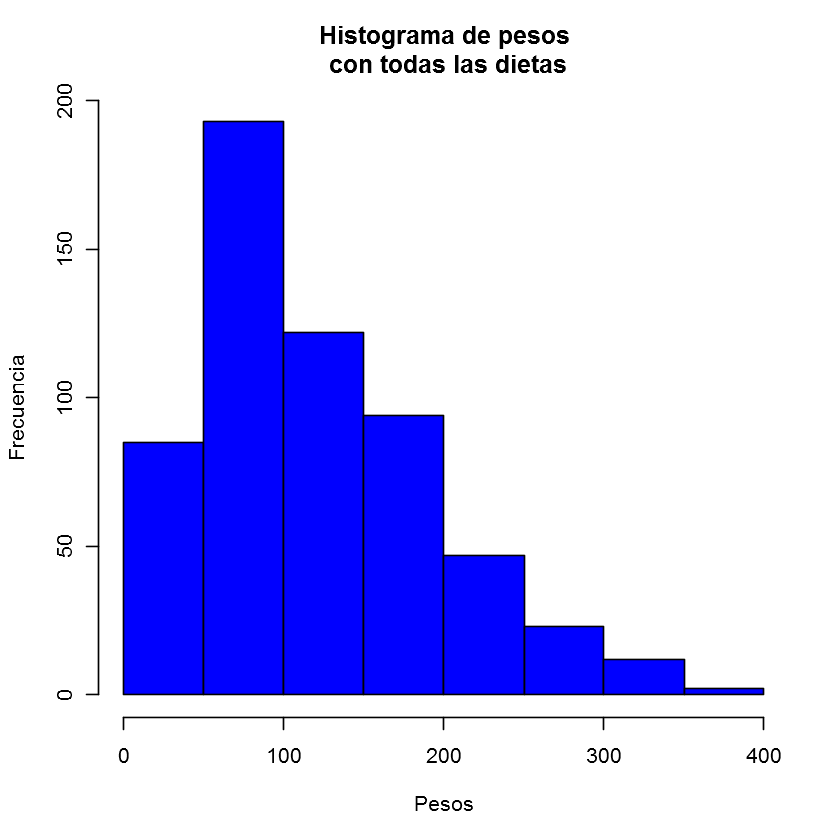

In [8]:
hist(weight,
     xlab="Pesos",
     ylab="Frecuencia",
     main="Histograma de pesos\n con todas las dietas", 
     col=4)


Como se puede observar los pesos entre 50 y 100 gramos son los que presentan mayor ocurreacia, cercano a las 200 veces.

**b.** En donde se encuentran concentrados los pesos de los pollos
dependiendo de las dietas. 

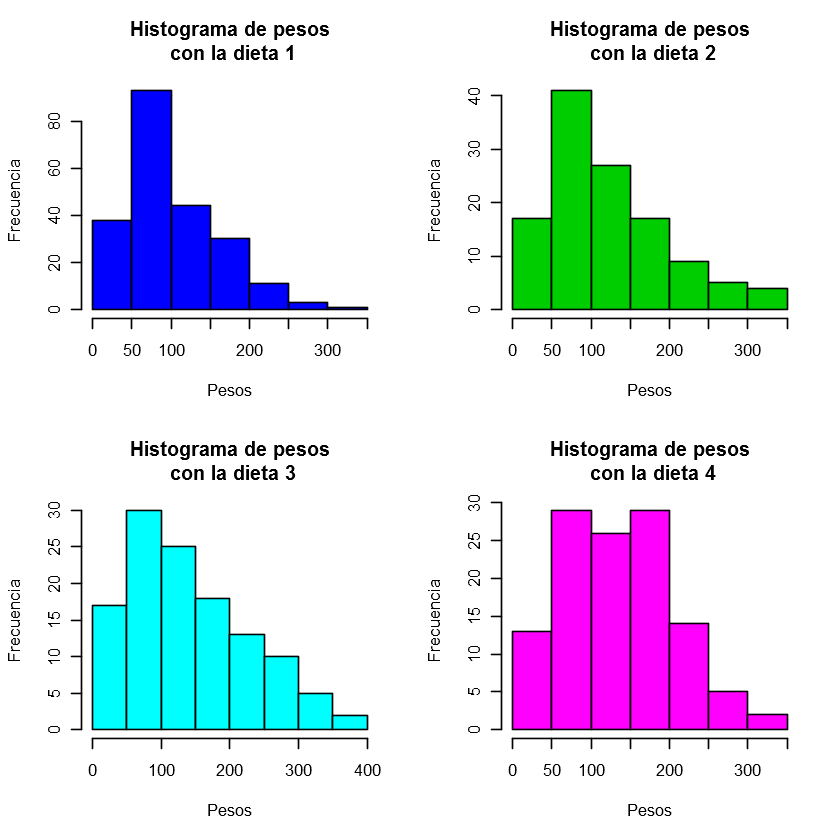

In [9]:
par(mfrow=c(2,2)) # la función par permite visualizar los resultados en un solo cuadro
                  # mfrow=c(2,2) le indico que la ventana grafica la divida en 2 filas y dos columnas
hist(weight[Diet==1], # solo tomo los pesos cuyos valores en la columna Diet correspondan a 1
     xlab="Pesos",
     ylab="Frecuencia",   
     main="Histograma de pesos\n con la dieta 1", 
     col=4) 
hist(weight[Diet==2], # solo tomo los pesos cuyos valores en la columna Diet correspondan a 2
     xlab="Pesos",
     ylab="Frecuencia",   
     main="Histograma de pesos\n con la dieta 2", 
     col=3)
hist(weight[Diet==3], # solo tomo los pesos cuyos valores en la columna Diet correspondan a 3
     xlab="Pesos",
     ylab="Frecuencia",   
     main="Histograma de pesos\n con la dieta 3", 
     col=5)
hist(weight[Diet==4], # solo tomo los pesos cuyos valores en la columna Diet correspondan a 4
     xlab="Pesos",
     ylab="Frecuencia",
     main="Histograma de pesos\n con la dieta 4", 
     col=6)

Concluya a partir de las gráficas

**c.** Como es el comportamiento de los pesos para las diferentes dietas. Este análisis deberá de incluir un análisis del promedio de los pesos y los diferentes cuartiles de los mismos.

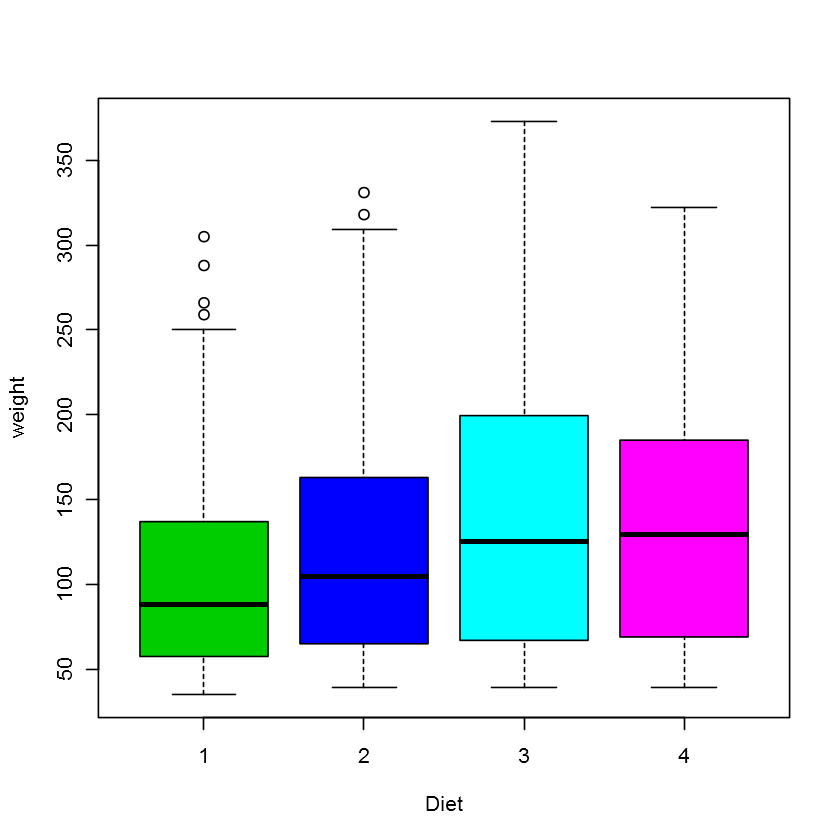

In [10]:
plot(weight~Diet,col=(3:7))

A partir de este gráfico puede concluir acerca del comportamiento de los datos alrededor de la mediana y los cuartiles, que tantan dispersión se observa en ellos y como estan variando estos datos. Puede adicionar otras conclusiones.

**2.** Luego del análisis realizado en el punto anterior, el encargado de la empresa
necesita, por temas de calidad, que el peso promedio de los pollos sea 122 sin
tener en cuenta que tipo de dieta esta utilizando. ¿Qué puede concluir? El
encargado, además, está interesado en saber si la media del peso de los pollos
es mayor con la dieta 4 que para la dieta 2(Suponga varianzas iguales). También
tiene la sospecha que la dieta 1 la 3  resultan dar
el mismo promedio de pesos (Suponga varianzas diferentes), ¿Qué opina usted de esta afirmación? Si se le
encarga a usted escoger una de las cuatro dietas para utilizar, cual escogería y
por qué.

**Solución:**   
Para este punto realizaremos pruebas de hipotesis para contrastar cada uno de los supuestos que se tienen

* El encargado de la empresa necesita, por temas de calidad, que el peso promedio de los pollos sea 122 sin tener en cuenta que tipo de dieta esta utilizando. ¿Qué puede concluir? 

In [27]:
# Se debe indicar primero cuales son nuestras pruebas. Se trabajara un alpha de 0.05
# H0: mu=122
# H1: mu!= 122 (diferente de 122)
a=t.test(x=weight, #Vector numérico que contiene la primera muestra de estudio para el caso de una muestra indica esta
       mu= 122,  # Valor numerico de la media que se desea probar
       conf.level = 0.95, 
       alternative = "two.sided")
a


	One Sample t-test

data:  weight
t = -0.061451, df = 577, p-value = 0.951
alternative hypothesis: true mean is not equal to 122
95 percent confidence interval:
 116.0121 127.6246
sample estimates:
mean of x 
 121.8183 


In [28]:
summary(a) # me permite ver como esta conformada la información de la prueba

            Length Class  Mode     
statistic   1      -none- numeric  
parameter   1      -none- numeric  
p.value     1      -none- numeric  
conf.int    2      -none- numeric  
estimate    1      -none- numeric  
null.value  1      -none- numeric  
alternative 1      -none- character
method      1      -none- character
data.name   1      -none- character

In [17]:
# Para obtener el valor de la tabla se puede hacer desde R o buscarlo en las tablas proporcionadas en clase
tcritico=qt(p=0.05/2,
            df=length(weight)-1, #length me da el tamaño de la columna weight, es decir, n
            lower.tail=F) # False para tomar los valores positivos 
tcritico

[1] 1.964084

In [30]:
# Para concluir puede usasr cualquiera de los dos criterios siguientes.
# El primero es comparar el valor absoluto del valor de t. 
#Si el valor absoluto del estadistico t es mayor que el valor critico de t (el de la tabla) se rechaza H0

abs(a$statistic)>tcritico # Le saco el valor absoluto del estadistico y comparo

t 
FALSE

Como 0.0614 no es mayor que 1.96 no rechazo H0, por tanto acepto que la media es 122 

In [32]:
# El segundo criterio es comparar el valor p, si el alpha es mayor que el vp rechazo la hipotesis nula
0.05>a$p.value


[1] FALSE

El valor P es mayor que el alpha por tanto no se rechaza la hipotesis nula, la media es 122

* Está interesado en saber si la media del peso de los pollos es mayor con la dieta 4 que para la dieta 2 (Suponga varianzas iguales)

In [38]:
# H0: mu4 - mu2 = 0  diferencia de las medias de la dieta 4 y la dieta 2
# H1: mu4 -mu2 > 0 

b = t.test(x=weight[Diet==4],       # Vector numérico que contiene la primera muestra de estudio 
           y=weight[Diet==2],       # Vector numérico que contiene la segunda muestra de estudio
           conf.level = 0.95,       # Nivel de confianza
           alternative = "greater", # Indica el tipo de la hipotesis alternativa. Diferencia="two.sided", mayor:"greater",
                                # menor= "less" 
           var.equal=TRUE)          # Valor lógico, TRUE indica varianzas iguales o FALSE indica varianzas diferentes
b


	Two Sample t-test

data:  weight[Diet == 4] and weight[Diet == 2]
t = 1.3886, df = 236, p-value = 0.08313
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.392269       Inf
sample estimates:
mean of x mean of y 
 135.2627  122.6167 


In [40]:
# El criterio de rechazo con el estadistico t:
# si el estadistico t es mayor que el t critico ( t de alpha con grado de liberdad n1+n2-2) se rechaza Ho

# Buscamos el valor critico en la tabla
tcritico=qt(p=0.05,
            df=length(weight[Diet==4])+length(weight[Diet==2])-2, #length me da el tamaño de cada conjunto de datos
            lower.tail=F) 
tcritico
b$statistic>tcritico

[1] 1.651336

t 
FALSE

Como el valor de t= 1.3886 es menor que el valor de t de la tabla 1.651 no se rechaza H0 y por tanto se acepta que la medida del peso de la dieta 4 es estadisticamente igual al de la media de la dieta 2

In [43]:
# Tambien se puede concluir con el valor P
0.05>b$p.value

[1] FALSE

Como el alpha es menor que el valor p (0.08313) no se rechaza H0

* También tiene la sospecha que la dieta 1 y la 3 resultan dar el mismo promedio de pesos(Suponga varianzas diferentes)

In [47]:
# H0: mu4 - mu2 = 0  diferencia de las medias de la dieta 4 y la dieta 2
# H1: mu4 -mu2 != 0 Diferente de cero 


In [48]:
t.test(x=weight[Diet==1],    #Vector numérico que contiene la primera muestra de estudio 
       y=weight[Diet==3],    #Vector numérico que contiene la segunda muestra de estudio
       conf.level = 0.95,    #Nivel de confianza
       alternative = "two.sided", #Indica el tipo de la hipotesis alternativa. Diferencia="two.sided",
                                 #mayor:"greater", menor= "less" 
       var.equal=FALSE)      #Valor lógico, TRUE indica varianzas iguales o FALSE indica varianzas diferentes



	Welch Two Sample t-test

data:  weight[Diet == 1] and weight[Diet == 3]
t = -4.593, df = 175.92, p-value = 8.298e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -57.62264 -22.98645
sample estimates:
mean of x mean of y 
 102.6455  142.9500 


*Concluya sobre la hipotesis*